# **Jobsheet 7 - Clustering**

## **Lab Work 1**
K-Means Clustering

Preparation

In [ ]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('/content/iris.csv')

# Peek Data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Select Features and Label

In [ ]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

Visualize data

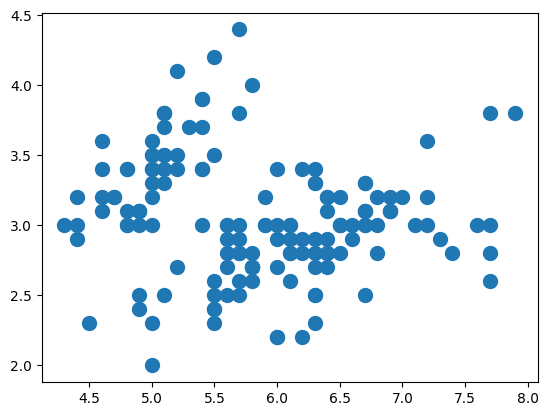

In [ ]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Make K-Means model

In [ ]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

Check cluster

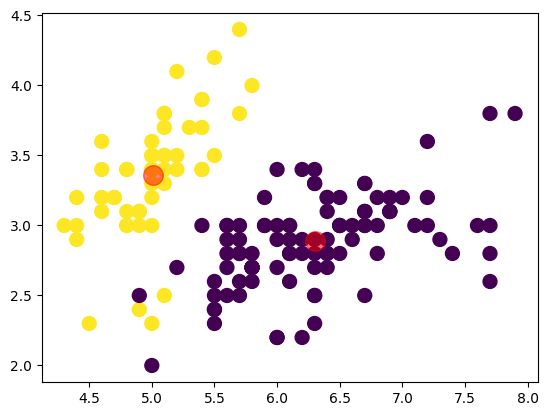

In [ ]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Evaluate model

In [ ]:
# Check the value of SSE
print(f'SSE: {cl_kmeans.inertia_}')

SSE: 152.36870647733915


Find the optimum K

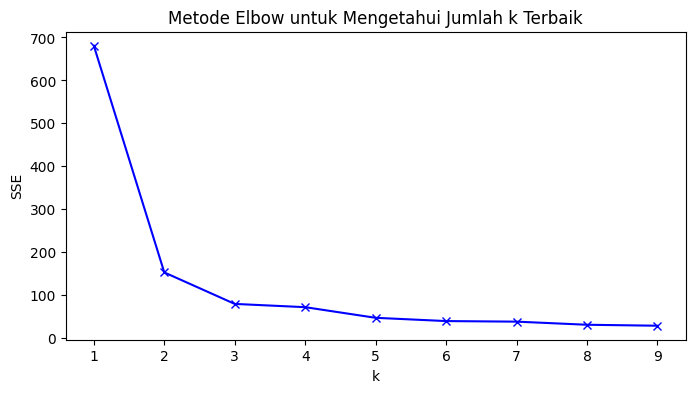

In [ ]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Check SSE value for each K

In [ ]:
# Check SSE value for each k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=71.34044682436698
k=5; SSE=46.535582051282034
k=6; SSE=38.94595367106238
k=7; SSE=37.60650087719299
k=8; SSE=30.358486167341443
k=9; SSE=28.105787878787886


## **Lab Work 2**
Clustering on Unstructure Data


Case 1: Numerical Images
In this work, you will try to cluster numerical images based on their characteristic. However, even this work using K-Means as the model, the entire process will be evaluated using classification metric named accuracy.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Make K-Means model

In [ ]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Plot digits cluster

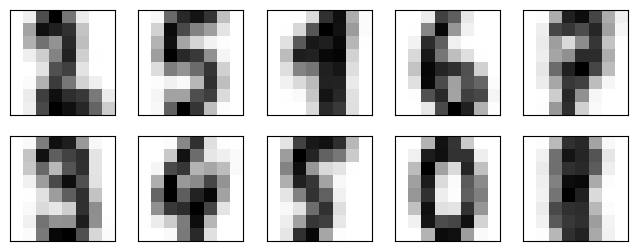

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Labeling Based on The Cluster

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Evaluate Based Using Accuract Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7440178074568725

Check the confusion matrix result,

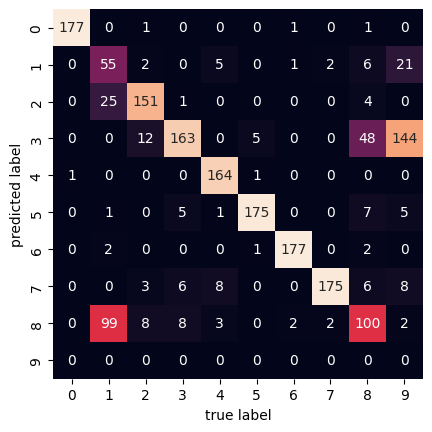

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Case 2: Image Compression
Clustering also can be use in image compression scenario. In this case, we will replace surrounding pixel value using similar value based on their cluster.

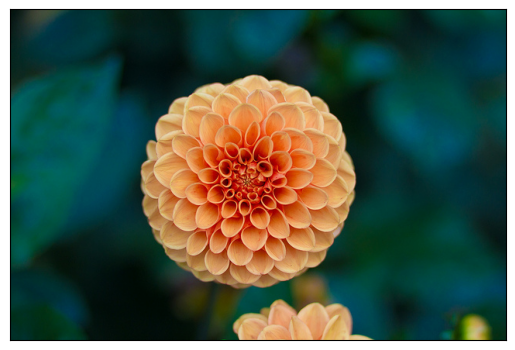

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [ ]:
flower.shape

(427, 640, 3)

Normalize the pixel value

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Plot The Pixel Distribution

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

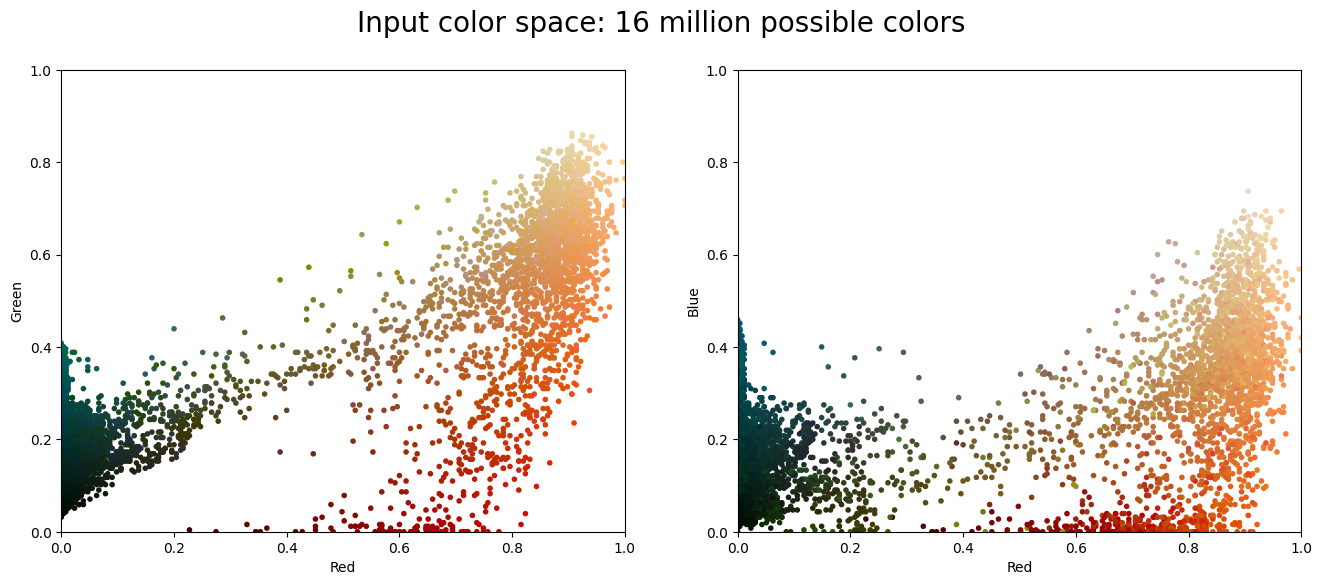

In [ ]:
# Call function
plot_pixels(data, title='Input color space: 16 million possible colors')

Make K-Means Model

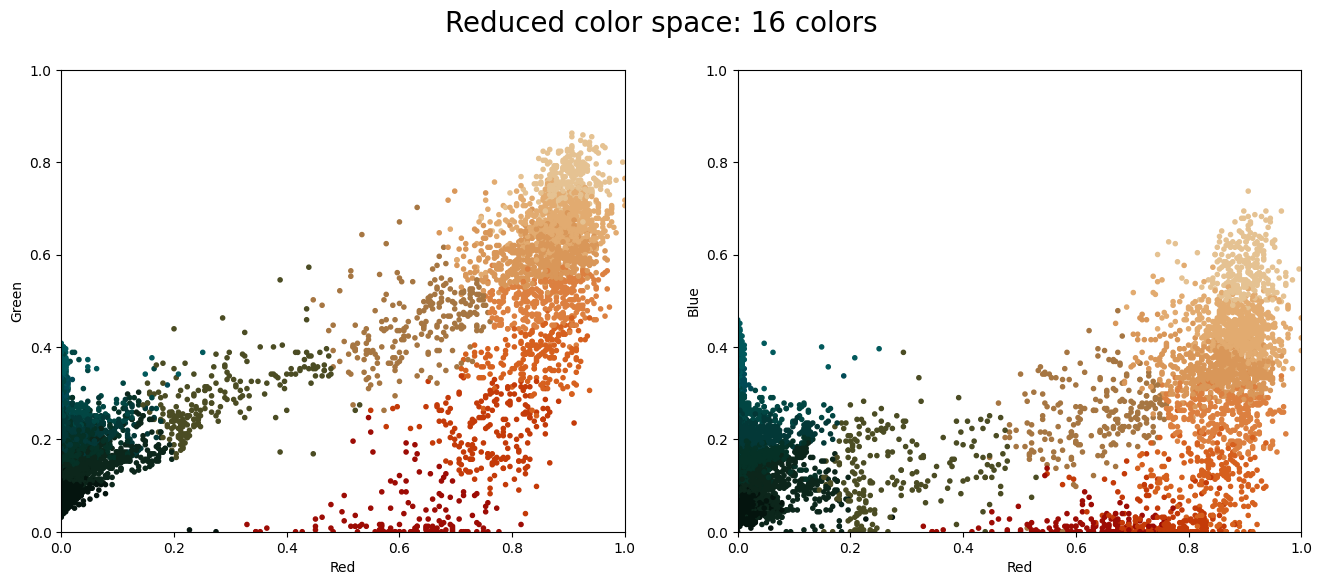

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Visualize The Result


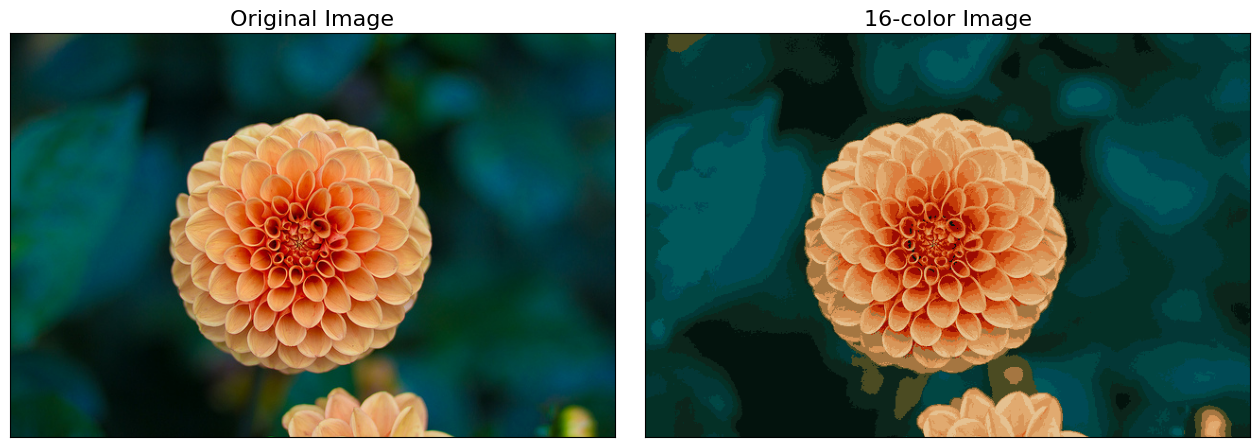

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## **Lab work 3**
Self-Organizing Map (SOM)

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=40bf7cd955cdd9a8d26c6ce009ba6d49f0388c00267df485dabda884eff135c4
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Normalize data

In [ ]:
# Normalize Data
data = data / data.max(axis=0)

Make SOM model

In [ ]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Initiatie Random Weight for SOM

In [ ]:
# Initiate random weight
som.random_weights_init(data)

Fit model

In [ ]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

Visualize SOM network

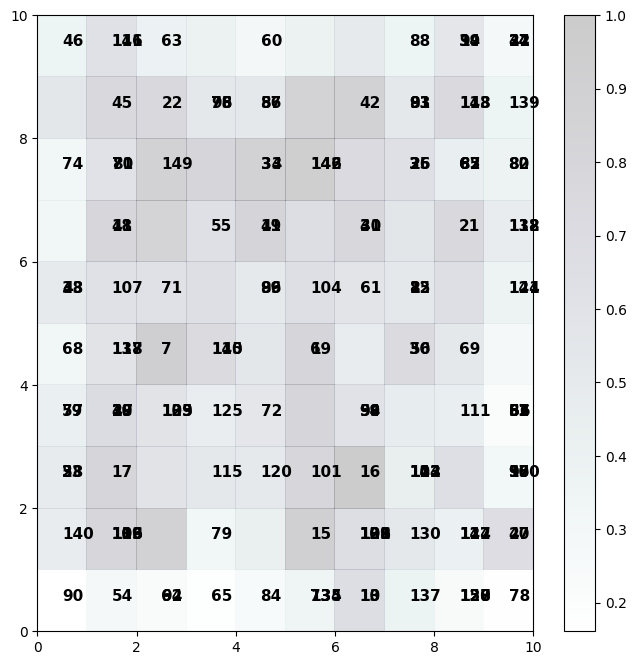

In [ ]:
# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()